**Proper Mask Wearing Detection Neural Network**

---



**Import select packages**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import PIL.Image
import pathlib

**Loading the Mask Dataset**

In [ ]:
# Loads the images and all other files
!git clone https://github.com/shaanverma/NeuralNetsFinal.git

# Removes the readme file and hidden files. Renames the mask directories
!rm -r NeuralNetsFinal/README.md NeuralNetsFinal/.git 
!mv /content/NeuralNetsFinal/01000_mask_mouth_chin_resized /content/NeuralNetsFinal/incorrect
!mv /content/NeuralNetsFinal/01000_mask_resized /content/NeuralNetsFinal/correct

In [ ]:
# Default path, image dimestions and batch size to be used in model
data_dir = '/content/NeuralNetsFinal/'
batch_size = 32 #Default
img_height = 200
img_width = 200

# Defining training data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print('\n')
'''
# Guidline for the default parameters
data_dir = tf.keras.preprocessing.image_dataset_from_directory(
          imageDirectory, labels='inferred', label_mode='int',
           class_names=None, color_mode='rgb', batch_size=32, image_size=(200,
           200), shuffle=True, seed=None, validation_split=None, subset=None,
         interpolation='bilinear', follow_links=False
           )
'''
# Defining validation/test data set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

'''
# Used for debugging purposes
data_dir = pathlib.Path(imageDirectory)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
correct = list(data_dir.glob('correct/*'))
PIL.Image.open(str(correct[0]))
incorrect = list(data_dir.glob('incorrect/*'))
PIL.Image.open(str(incorrect[0]))
'''
# Prints names of all classifications to console
class_names = train_ds.class_names
print('\n','Class names: ',class_names)



**Visualizing some of the images in the training set**

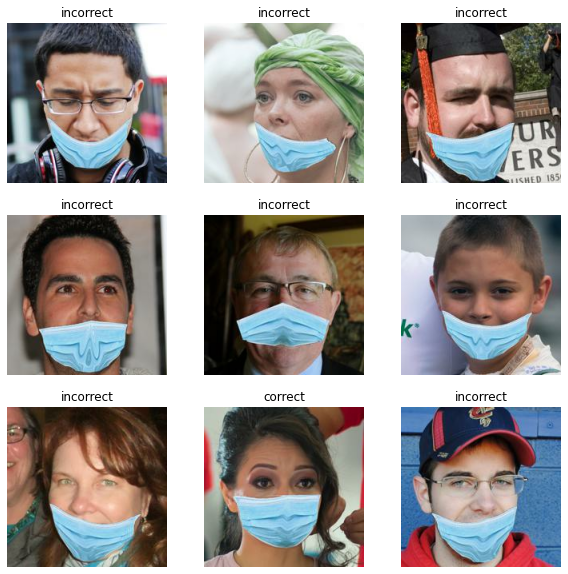

In [ ]:
# Test a few of the loaded images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


**Configuring the dataset for performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Training the Model**

In [ ]:
num_classes = 2
epochs = 3

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  #loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  #loss=tf.losses.MeanAbsoluteError(),
  loss=tf.losses.MeanAbsoluteError(),
  metrics=['accuracy'])

history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)


Epoch 1/3
50/50 [==============================] - 67s 1s/step - loss: 0.4637 - accuracy: 0.4615 - val_loss: 0.1299 - val_accuracy: 0.5500
Epoch 2/3
50/50 [==============================] - 67s 1s/step - loss: 0.1086 - accuracy: 0.5117 - val_loss: 0.1123 - val_accuracy: 0.6375
Epoch 3/3
50/50 [==============================] - 67s 1s/step - loss: 0.0873 - accuracy: 0.4873 - val_loss: 0.1118 - val_accuracy: 0.2500


**Architecture of the Model**

In [ ]:
model.summary()

**Evaluate the Model**

In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


NameError: ignored

**Predict on new data**

This image most likely belongs to 'incorrect' with a 50.65 percent confidence.


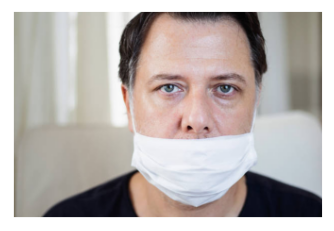

In [ ]:
def predictNew(imagePath):
  height = 200
  width = 200
  img = tf.keras.preprocessing.image.load_img(
      imagePath, target_size=(height,width)
  )
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  img = mpimg.imread(imagePath)
  plt.figure
  plt.imshow(img)
  plt.axis('off')

  print(
      "This image most likely belongs to '{}' with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

predictNew('/content/sample_data/sample3.jpg')